import library from tensorflow, pandas, numpy, matplotlib

In [17]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as prediction

insert data from csv file

In [3]:
df = pd.read_csv('~/tutorialTensorFlow/Data_Boat_Inverse_Lengkap.csv')

there are 11 coloumns, 9 first coloumns as input and 2 last coloumns as output. there are 2000 rows, 1000 first row as data for learning and 1000 last row for test 

In [4]:
data = df.values
X_data = data[:,:-2]
Y_data = data[:,-2:]

X = X_data[:-1000]
Y = Y_data[:-1000]
X_test = X_data[-1000:]
Y_test = Y_data[-1000:]

show data

In [6]:
print(X_data[:10])

[[ 3.50808552e-02  0.00000000e+00  3.00000000e-02  0.00000000e+00
   1.83682945e-05  0.00000000e+00  7.00000000e-02  1.04955357e-04
   8.59070859e-02]
 [ 8.59070859e-02  3.50808552e-02  7.00000000e-02  3.00000000e-02
   1.04955357e-04  1.83682945e-05  1.20000000e-01  3.18488776e-04
   1.52066966e-01]
 [ 1.52066966e-01  8.59070859e-02  1.20000000e-01  7.00000000e-02
   3.18488776e-04  1.04955357e-04  1.30000000e-01  5.00135746e-04
   2.20427833e-01]
 [ 2.20427833e-01  1.52066966e-01  1.30000000e-01  1.20000000e-01
   5.00135746e-04  3.18488776e-04  1.30000000e-01  6.64054310e-04
   2.92672647e-01]
 [ 2.92672647e-01  2.20427833e-01  1.30000000e-01  1.30000000e-01
   6.64054310e-04  5.00135746e-04  6.00000000e-02  3.89739735e-04
   3.72173896e-01]
 [ 3.72173896e-01  2.92672647e-01  6.00000000e-02  1.30000000e-01
   3.89739735e-04  6.64054310e-04 -1.00000000e-02 -7.82439303e-05
   4.48304693e-01]
 [ 4.48304693e-01  3.72173896e-01 -1.00000000e-02  6.00000000e-02
  -7.82439303e-05  3.8973973

make a model. 9 input, 5 hidden layers with 128 node in each layer, 2 output

In [8]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      #tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(2, activation= tf.keras.activations.linear)
    ])
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate =0.001),loss='mean_squared_error',metrics=['accuracy'])

 learning process with 1000 epochs

In [11]:
learn = model.fit(X, Y, epochs= 100)

Epoch 1/100
272/272 [==============================] - 0s 1ms/step - loss: 395.1455 - accuracy: 0.6362
Epoch 2/100
272/272 [==============================] - 0s 1ms/step - loss: 400.5129 - accuracy: 0.6307
Epoch 3/100
272/272 [==============================] - 0s 1ms/step - loss: 395.6060 - accuracy: 0.6409
Epoch 4/100
272/272 [==============================] - 0s 1ms/step - loss: 387.0140 - accuracy: 0.6243
Epoch 5/100
272/272 [==============================] - 0s 1ms/step - loss: 399.8319 - accuracy: 0.6300
Epoch 6/100
272/272 [==============================] - 0s 1ms/step - loss: 397.5517 - accuracy: 0.6366
Epoch 7/100
272/272 [==============================] - 0s 1ms/step - loss: 379.5505 - accuracy: 0.6340
Epoch 8/100
272/272 [==============================] - 0s 1ms/step - loss: 376.9121 - accuracy: 0.6358
Epoch 9/100
272/272 [==============================] - 0s 1ms/step - loss: 396.8313 - accuracy: 0.6304
Epoch 10/100
272/272 [==============================] - 0s 1ms/step - los

272/272 [==============================] - 0s 1ms/step - loss: 352.5627 - accuracy: 0.6351
Epoch 80/100
272/272 [==============================] - 0s 2ms/step - loss: 377.2522 - accuracy: 0.6168
Epoch 81/100
272/272 [==============================] - 0s 1ms/step - loss: 360.3206 - accuracy: 0.6270
Epoch 82/100
272/272 [==============================] - 0s 1ms/step - loss: 339.0828 - accuracy: 0.6311
Epoch 83/100
272/272 [==============================] - 0s 1ms/step - loss: 369.8972 - accuracy: 0.6256
Epoch 84/100
272/272 [==============================] - 0s 1ms/step - loss: 375.9590 - accuracy: 0.6330
Epoch 85/100
272/272 [==============================] - 0s 1ms/step - loss: 358.8499 - accuracy: 0.6327
Epoch 86/100
272/272 [==============================] - 0s 1ms/step - loss: 349.2888 - accuracy: 0.6273
Epoch 87/100
272/272 [==============================] - 0s 2ms/step - loss: 368.9646 - accuracy: 0.6307
Epoch 88/100
272/272 [==============================] - 0s 2ms/step - loss: 3

plot error graph from learning process

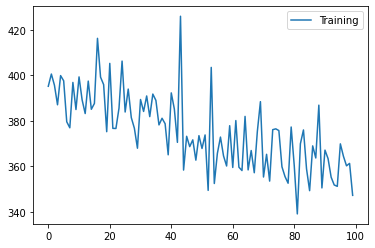

In [12]:
plt.plot(learn.history['loss'],label = 'Training')
plt.legend()
plt.show()

predict output using model

In [13]:
Y_pred = model.predict(X_test)

Plot predict result

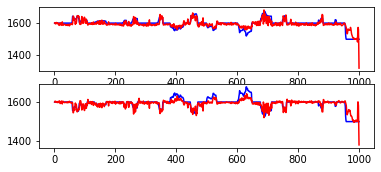

In [14]:
x_label = np.arange(1,1001,1)
plt.figure()
plt.subplot(311)
plt.plot(x_label, Y_test[:,0], '-b', x_label, Y_pred[:,0], '-r')
plt.subplot(312)
plt.plot(x_label, Y_test[:,1], '-b', x_label, Y_pred[:,1], '-r')
plt.show()

summary of model

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1280      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 258       
Total params: 67,586
Trainable params: 67,586
Non-trainable params: 0
__________________________________________________

save your model

In [20]:
model.save_weights('./model_boat/hehe')

made a new model

In [24]:
model_new = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      #tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(2, activation= tf.keras.activations.linear)
    ])
model_new.compile(optimizer= tf.keras.optimizers.Adam(learning_rate =0.001),loss='mean_squared_error',metrics=['accuracy'])


load previous model to new model

In [27]:
model_new.load_weights('./model_boat/hehe')
loss,acc = model_new.evaluate(X,  Y, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

272/272 - 0s - loss: 340.7908 - accuracy: 0.5010
Restored model, accuracy: 50.10%
